In [1]:
from google.colab import files
uploaded = files.upload()


Saving hotel_bookings - hotel_bookings (1).csv to hotel_bookings - hotel_bookings (1).csv


## Phase 1: Exploratory Data Analysis (EDA) & Data Quality Report

Steps:

Load data & summaries

In [14]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
df = pd.read_csv('hotel_bookings - hotel_bookings (1).csv')


In [5]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
print(df.shape)


(119390, 32)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
hotel,119390,2,City Hotel,79330,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_canceled,119390.0,NaN,NaN,NaN,0.370416,0.482918,0.0,0.0,0.0,1.0,1.0
lead_time,119390.0,NaN,NaN,NaN,104.011416,106.863097,0.0,18.0,69.0,160.0,737.0
arrival_date_year,119390.0,NaN,NaN,NaN,2016.156554,0.707476,2015.0,2016.0,2016.0,2017.0,2017.0
arrival_date_month,119390,12,August,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN
arrival_date_week_number,119390.0,NaN,NaN,NaN,27.165173,13.605138,1.0,16.0,28.0,38.0,53.0
arrival_date_day_of_month,119390.0,NaN,NaN,NaN,15.798241,8.780829,1.0,8.0,16.0,23.0,31.0
stays_in_weekend_nights,119390.0,NaN,NaN,NaN,0.927599,0.998613,0.0,0.0,1.0,2.0,19.0
stays_in_week_nights,119390.0,NaN,NaN,NaN,2.500302,1.908286,0.0,1.0,2.0,3.0,50.0
adults,119390.0,NaN,NaN,NaN,1.856403,0.579261,0.0,2.0,2.0,2.0,55.0


2_Missing values

In [13]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


detect the outliers

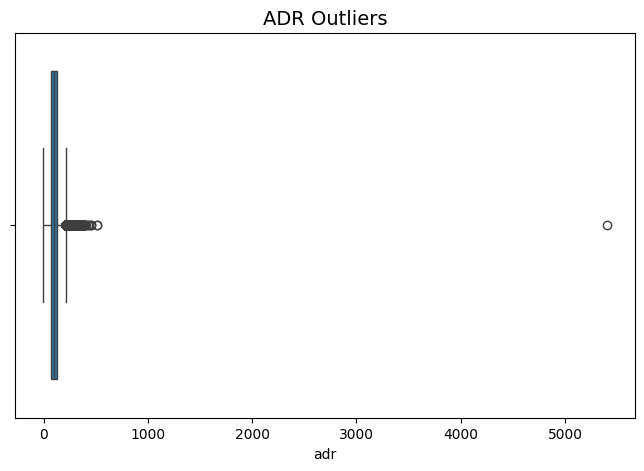

In [16]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["adr"])
plt.title("ADR Outliers", fontsize=14)
plt.show()



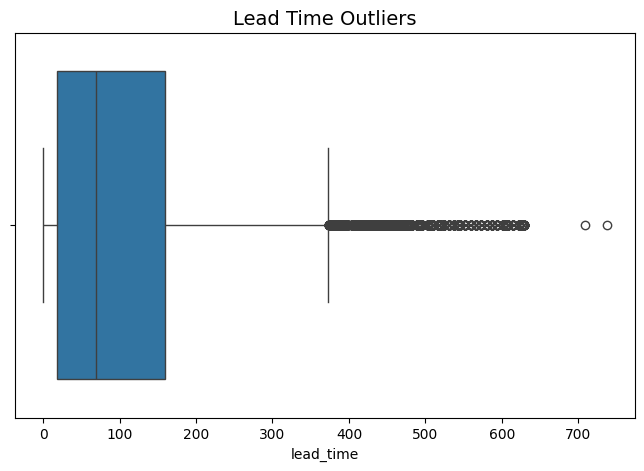

In [17]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df["lead_time"])
plt.title("Lead Time Outliers", fontsize=14)
plt.show()

In [18]:
def detect_outliers(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    print(f"{col} Outliers: {outliers.shape[0]} rows")
    return outliers

detect_outliers("adr")
detect_outliers("lead_time")

adr Outliers: 3793 rows
lead_time Outliers: 3005 rows


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
225,Resort Hotel,0,394,2015,July,28,8,2,5,2,...,No Deposit,40.0,NaN,0,Contract,89.68,0,0,Check-Out,2015-07-15
890,Resort Hotel,0,460,2015,August,32,3,2,5,1,...,No Deposit,40.0,NaN,0,Contract,77.54,0,0,Check-Out,2015-08-10
1516,Resort Hotel,0,381,2015,September,36,1,4,10,2,...,No Deposit,40.0,NaN,0,Contract,82.88,0,0,Check-Out,2015-09-15
1672,Resort Hotel,0,382,2015,September,37,8,4,10,2,...,No Deposit,40.0,NaN,0,Contract,76.50,0,0,Check-Out,2015-09-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119102,City Hotel,0,518,2017,August,34,26,2,1,1,...,No Deposit,229.0,NaN,0,Transient-Party,0.00,0,0,Check-Out,2017-08-29
119107,City Hotel,0,518,2017,August,34,26,2,1,2,...,No Deposit,229.0,NaN,0,Transient-Party,112.67,0,1,Check-Out,2017-08-29
119109,City Hotel,0,518,2017,August,34,26,2,1,2,...,No Deposit,229.0,NaN,0,Transient-Party,112.67,0,1,Check-Out,2017-08-29
119111,City Hotel,0,518,2017,August,34,26,2,1,2,...,No Deposit,229.0,NaN,0,Transient-Party,112.67,0,1,Check-Out,2017-08-29


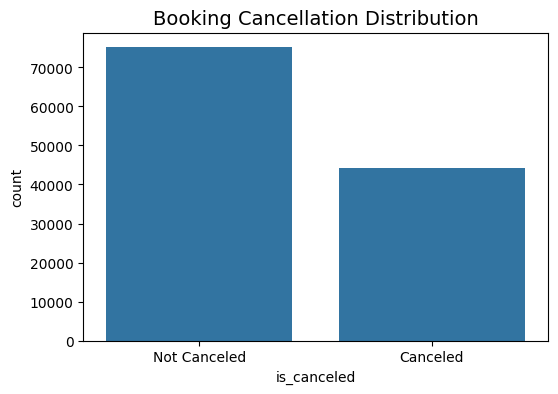

is_canceled
0    62.958372
1    37.041628
Name: proportion, dtype: float64


In [19]:
plt.figure(figsize=(6,4))
sns.countplot(x="is_canceled", data=df)
plt.title("Booking Cancellation Distribution", fontsize=14)
plt.xticks([0,1], ["Not Canceled","Canceled"])
plt.show()

print(df["is_canceled"].value_counts(normalize=True)*100)


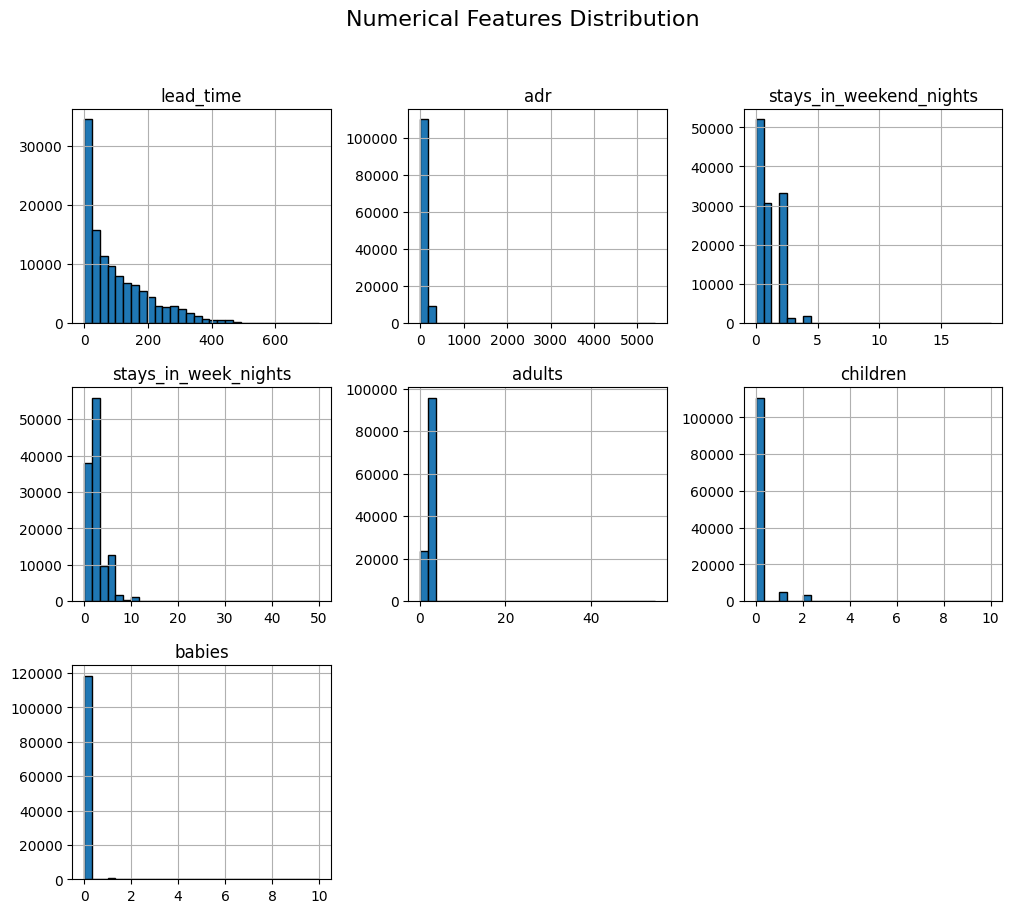

In [20]:
num_cols = ["lead_time", "adr", "stays_in_weekend_nights", "stays_in_week_nights", "adults", "children", "babies"]

df[num_cols].hist(figsize=(12,10), bins=30, edgecolor="black")
plt.suptitle("Numerical Features Distribution", fontsize=16)
plt.show()


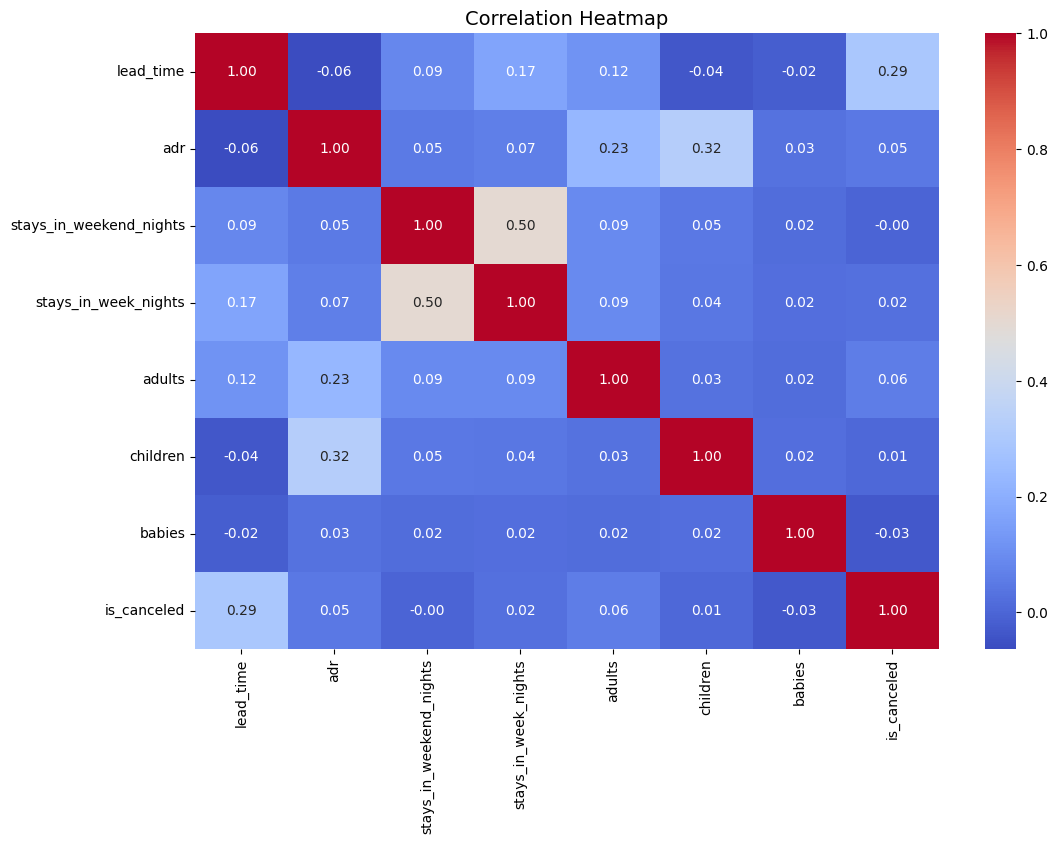

In [21]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols+["is_canceled"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap", fontsize=14)
plt.show()


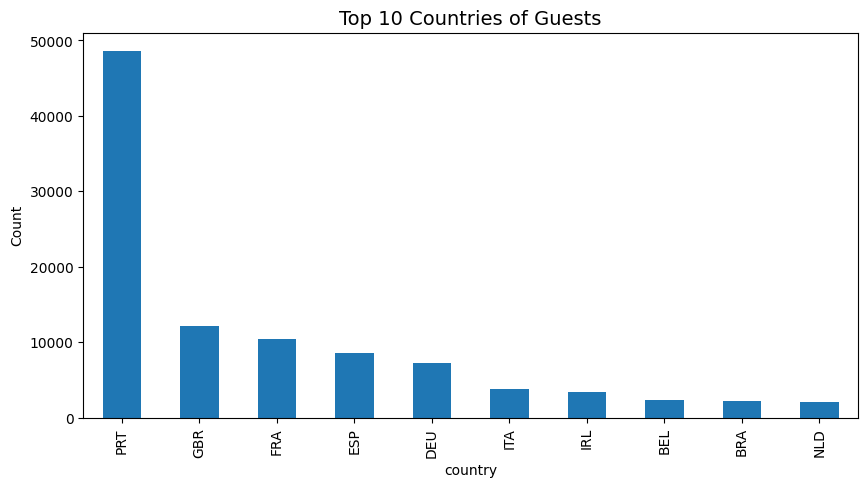

In [22]:
plt.figure(figsize=(10,5))
df["country"].value_counts().head(10).plot(kind="bar")
plt.title("Top 10 Countries of Guests", fontsize=14)
plt.ylabel("Count")
plt.show()


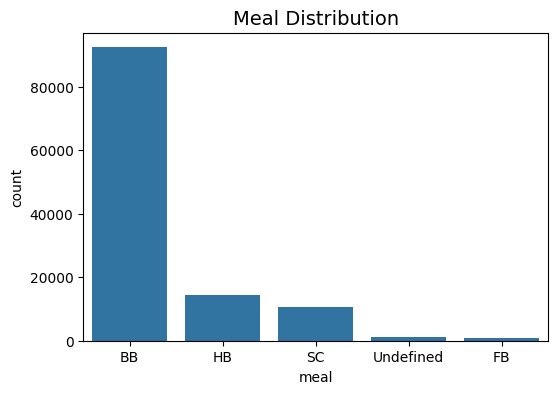

In [23]:
plt.figure(figsize=(6,4))
sns.countplot(x="meal", data=df, order=df["meal"].value_counts().index)
plt.title("Meal Distribution", fontsize=14)
plt.show()


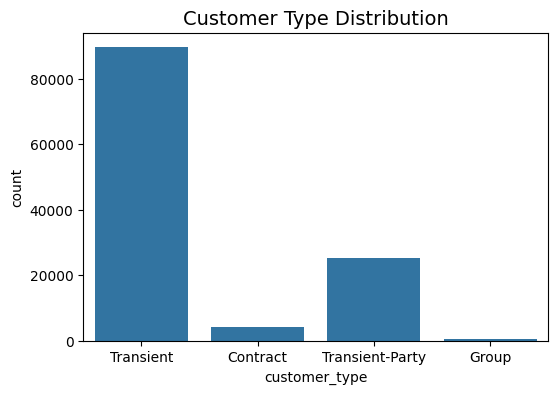

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x="customer_type", data=df)
plt.title("Customer Type Distribution", fontsize=14)
plt.show()


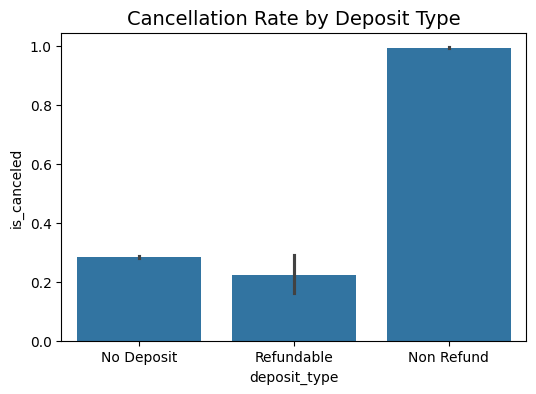

In [25]:
plt.figure(figsize=(6,4))
sns.barplot(x="deposit_type", y="is_canceled", data=df)
plt.title("Cancellation Rate by Deposit Type", fontsize=14)
plt.show()


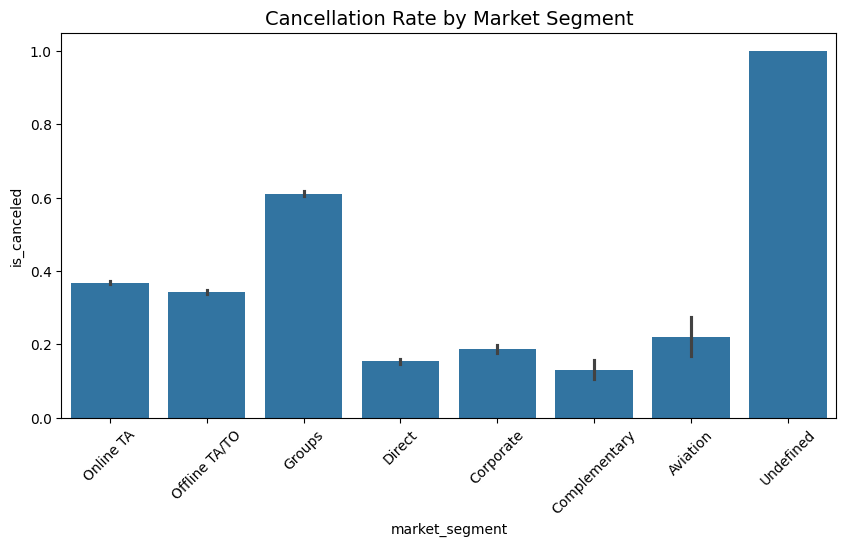

In [26]:
plt.figure(figsize=(10,5))
sns.barplot(x="market_segment", y="is_canceled", data=df, order=df["market_segment"].value_counts().index)
plt.title("Cancellation Rate by Market Segment", fontsize=14)
plt.xticks(rotation=45)
plt.show()


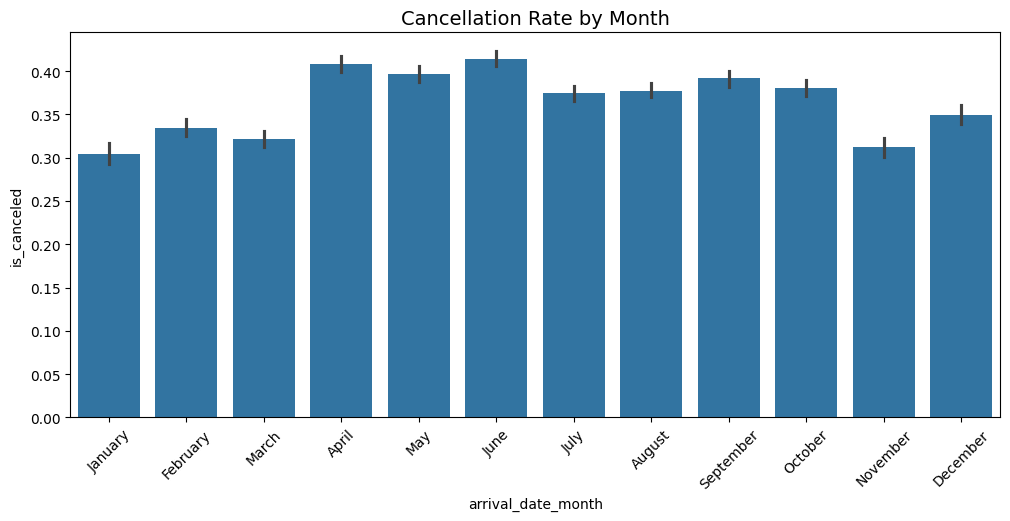

In [27]:
plt.figure(figsize=(12,5))
sns.barplot(x="arrival_date_month", y="is_canceled", data=df,
            order=["January","February","March","April","May","June","July","August","September","October","November","December"])
plt.title("Cancellation Rate by Month", fontsize=14)
plt.xticks(rotation=45)
plt.show()


Phase 2: Data Cleaning

handle missing

In [29]:
# agent & company
df["agent"].fillna(0)
df["company"].fillna(0)

# country
df["country"].fillna(df["country"].mode()[0])

# children
df["children"].fillna(df["children"].median())

print(df.isnull().sum().sum(), "missing values left")


0 missing values left


handle duplicates

In [30]:
print("Before:", df.shape)
df.drop_duplicates(inplace=True)
print("After:", df.shape)


Before: (119390, 32)
After: (87377, 32)


handle outliries

In [31]:
print("ADR values > 1000:", (df["adr"] > 1000).sum())
df.loc[df["adr"] > 1000, "adr"] = 1000


ADR values > 1000: 1


In [32]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"])
df.dtypes[["reservation_status_date"]]


,0
reservation_status_date,datetime64[ns]


In [33]:
print("Final Shape:", df.shape)
print("Missing values:", df.isnull().sum().sum())
print("Duplicates left:", df.duplicated().sum())
print("Max ADR:", df["adr"].max())


Final Shape: (87377, 32)
Missing values: 0
Duplicates left: 0
Max ADR: 1000.0


Phase 3: Feature Engineering & Preprocessing

In [34]:
df["total_guests"] = df["adults"] + df["children"] + df["babies"]
df["total_nights"] = df["stays_in_weekend_nights"] + df["stays_in_week_nights"]
df["is_family"] = ((df["children"] + df["babies"]) > 0).astype(int)


Encoding

In [35]:
low_cardinality = ["meal", "market_segment", "distribution_channel", "deposit_type", "customer_type"]
df = pd.get_dummies(df, columns=low_cardinality, drop_first=True)


Data leakage

In [36]:
df.drop(["reservation_status", "reservation_status_date"], axis=1, inplace=True)


Split

In [37]:
from sklearn.model_selection import train_test_split

# target & features
X = df.drop("is_canceled", axis=1)
y = df["is_canceled"]

# split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (69901, 47)
Test shape: (17476, 47)
